# Algorytmy tekstowe

## Laboratorium 1

### Adam Naumiec

# ***

Import bibliotek.

In [1]:
import numpy as np
from time import perf_counter as perf
import pandas as pd
import matplotlib.pyplot as plt

## Zadanie 1

Zaimplementuj w Pythonie algorytmy wyszukiwania wzorców:
1. naiwny
2. automat skończony
3. algorytm KMP

### Algorytm naiwny

In [2]:
def naive_search(T, P):
    time_start = perf()
    
    n = len(T)
    m = len(P)
    matches = 0
    
    for i in range(n - m + 1):
        if P == T[i:i + m]:
            matches += 1
        
    time_stop = perf()
    
    return matches, time_stop - time_start, 0

### Automat skończony

In [3]:
def finite_automaton_search(T, P):
    time_start_preprocessing = perf()
    
    delta = [{} for _ in range(len(P) + 1)]
    alphabet = set(P)
    
    for i in range(len(P) + 1):
        for alpha in alphabet:
            q = min(len(P), i + 1)
            
            while q > 0 and P[:q] != (P[:i] + alpha)[-q:]:
                q -= 1
                
            delta[i][alpha] = q
            
    time_stop_preprocessing = perf()
    
    time_start = perf()
    
    n = len(T)
    m = len(P)
    matches = 0
    
    q = 0
    for i in range(n):
        if T[i] in delta[q]:
            q = delta[q][T[i]]
            
            if q == m:
                matches += 1
        else:
            q = 0
            
    time_stop = perf()
    
    return matches, time_stop - time_start, time_stop_preprocessing - time_start_preprocessing

### Algorytm KMP

In [4]:
def compute_lps(P):
    m = len(P)
    
    lps = [0 for _ in range(m)]
    
    i = 0 
    for j in range(1, m):
        while i > 0 and P[i] != P[j]:
            i = lps[i-1]
            
        if P[i] == P[j]:
            i += 1

        lps[j] = i

    return lps


def kmp_search(T, P):
    time_start_preprocessing = perf()
    lps = compute_lps(P)
    time_stop_preprocessing = perf()
    
    time_start = perf()
    
    n = len(T)
    m = len(P)
    matches = 0
    
    j = 0
    for i in range(n):
        while j > 0 and P[j] != T[i]:
            j = lps[j - 1]
        
        if P[j] == T[i]:
            j += 1
        
        if j == m:
            matches += 1
            j = lps[j - 1]
    
    time_stop = perf()
    
    return matches, time_stop - time_start, time_stop_preprocessing - time_start_preprocessing

## Zadanie 2

Zaimplementuj testy porównujące szybkość działania wyżej wymienionych algorytmów, z rozbiciem na czasu pre-processingu oraz czas wyszukiwania wzorca w tekście (1p).

In [5]:
def test_perf(T, P):
    # 1. Number of pattern occurrences in text 
    # 2. Execution time
    # 3. Preprocessing time
    
    result_naive = naive_search(T, P)
    result_finite_automaton = finite_automaton_search(T, P)
    result_kmp = kmp_search(T, P)
    
    return result_naive, result_finite_automaton, result_kmp

In [6]:
def test_perf_table(T, P):
    result_naive = naive_search(T, P)
    result_finite_automaton = finite_automaton_search(T, P)
    result_kmp = kmp_search(T, P)
    
    data = pd.DataFrame({
        "Result": [result_naive[0],  result_finite_automaton[0],  result_kmp[0]],
        "Execution time": [result_naive[1],  result_finite_automaton[1],  result_kmp[1]],
        "Preprocessing time": [result_naive[2],  result_finite_automaton[2],  result_kmp[2]]},
        index = ["Naive algorithm", "Finite automaton", "KMP"])
    
    return data

In [7]:
def perf_stats(T, P, rng=10):   
    data_naive = []
    data_finite_automaton = []
    data_kmp = []
    
    for i in range(rng):
        data_result = test_perf(T, P)
        
        data_naive.append(data_result[0])
        data_finite_automaton.append(data_result[1])
        data_kmp.append(data_result[2])
    
    algorithms_names =  ["Naive algorithm", "Finite automaton", "KMP"]
    
    min_naive = min(x[1] + x[2] for x in data_naive)
    min_finite_automaton = min(x[1] + x[2] for x in data_finite_automaton)
    min_kmp = min(x[1] + x[2] for x in data_kmp)
    
    max_naive = max(x[1] + x[2] for x in data_naive)
    max_finite_automaton = max(x[1] + x[2] for x in data_finite_automaton)
    max_kmp = max(x[1] + x[2] for x in data_kmp)
    
    avg_naive = sum(x[1] + x[2] for x in data_naive) / rng
    avg_finite_automaton = sum(x[1] + x[2] for x in data_finite_automaton) / rng
    avg_kmp = sum(x[1] + x[2] for x in data_kmp) / rng
    
    
    data = pd.DataFrame({
        "Result": [data_naive[0][0],  data_finite_automaton[0][0],  data_kmp[0][0]],
        "Min time": [min_naive, min_finite_automaton, min_kmp],
        "Max time": [max_naive, max_finite_automaton, max_kmp],
        "Avg time": [avg_naive, avg_finite_automaton, avg_kmp]
    }, index = algorithms_names)
    
    
    min_plot = [min_naive, min_finite_automaton, min_kmp]
    avg_plot = [avg_naive, avg_finite_automaton, avg_kmp]
    max_plot = [max_naive, max_finite_automaton, max_kmp]

    width = 0.2
    index = np.arange(3)
    plt.xticks(index, algorithms_names)

    plt.bar(index - width, min_plot, width, label="Min")
    plt.bar(index, avg_plot, width, label="Avg")
    plt.bar(index + width, max_plot, width, label="Max")

    plt.legend()
    plt.title("Performance tests")
    plt.xlabel("Algorithm")
    plt.ylabel("Time [s]")
    
    plt.show()
    print(data)

## Zadanie 3

Znajdź wszystkie wystąpienia wzorców "pan" oraz "pani" w załączonym pliku, za pomocą każdego algorytmu. W raporcie zamieść liczbę dopasowań każdego ze wzorców osobno dla każdego algorytmu. Upewnij się, że każdy algorytm zwraca taką samą liczbę dopasowań (1p).

In [8]:
def pan_tadeusz():
    with open("pan-tadeusz.txt", "r", encoding="UTF-8") as file:
        text = file.read()
        pan = "pan"
        pani = "pani"

        pan_naive = naive_search(text, pan)[0]
        pani_naive = naive_search(text, pani)[0]

        pan_finite_automaton = finite_automaton_search(text, pan)[0]
        pani_finite_automaton = finite_automaton_search(text, pani)[0]

        pan_kmp = kmp_search(text, pan)[0]
        pani_kmp = kmp_search(text, pani)[0]

        print("Liczba dopasowań wzorca 'pan':")
        print("Algorytm naiwny:", pan_naive)
        print("Automat skończony:", pan_finite_automaton)
        print("Algorytm KMP:", pan_kmp)
        print("")
        print("Liczba dopasowań wzorca 'pani':")
        print("Algorytm naiwny:", pani_naive)
        print("Automat skończony:", pani_finite_automaton)
        print("Algorytm KMP:", pani_kmp)
        print("")

        flag = True

        if (pan_naive == pan_finite_automaton == pan_kmp):
            print("Algorytmy zwracają taką samą liczbę dopasowań dla: 'pan'.")
        else:
            print("Algorytmy zwracają różne wyniki dla: 'pan'!")
            flag = False

        if (pani_naive == pani_finite_automaton == pani_kmp):
            print("Algorytmy zwracają taką samą liczbę dopasowań dla: 'pani'.")
        else:
            print("Algorytmy zwracają różne wyniki dla: 'pani'!")
            flag = False

        if flag:
            print("\nALGORYTMY DZIAŁAJĄ POPRAWNIE")
        else:
            print("\nALGORYTMY NIE DZIAŁAJĄ POPRAWNIE")

pan_tadeusz()

Liczba dopasowań wzorca 'pan':
Algorytm naiwny: 401
Automat skończony: 401
Algorytm KMP: 401

Liczba dopasowań wzorca 'pani':
Algorytm naiwny: 100
Automat skończony: 100
Algorytm KMP: 100

Algorytmy zwracają taką samą liczbę dopasowań dla: 'pan'.
Algorytmy zwracają taką samą liczbę dopasowań dla: 'pani'.

ALGORYTMY DZIAŁAJĄ POPRAWNIE


## Zadanie 4

Porównaj szybkość działania algorytmów dla problemu z p. 3, z uwzględnieniem czasu pre-processingu oraz czasu dopasowania. Pomiar czasu powinien być przeprowadzony co najmniej 5-krotnie i przedstawione w formie tabeli oraz wykresu, uwzględniającego czas minimalny, maksymalny oraz średni czas (1p).

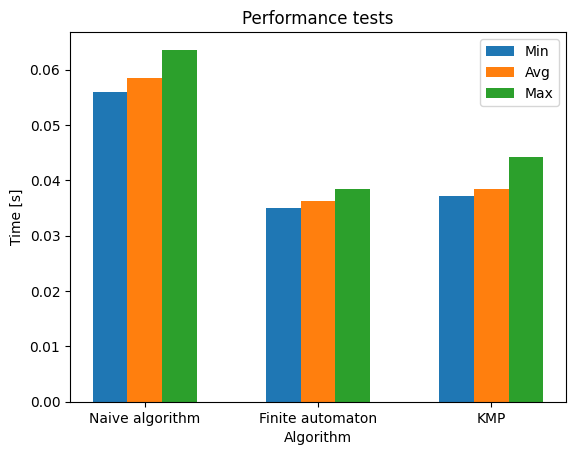

                  Result  Min time  Max time  Avg time
Naive algorithm      401  0.055871  0.063592  0.058550
Finite automaton     401  0.034962  0.038347  0.036314
KMP                  401  0.037121  0.044169  0.038431


In [9]:
def stats_pan_tadeusz():
    with open("pan-tadeusz.txt", "r", encoding="UTF-8") as file:
            text = file.read()
            pattern = "pan"

    perf_stats(text, pattern)
    
stats_pan_tadeusz()

## Zadanie 5

Zaproponuj tekst oraz wzorzec, dla którego zmierzony czas działania algorytmów 2 oraz 3 (uwzględniający tylko dopasowanie, bez pre-processingu) będzie co najmniej 5-krotnie krótszy niż dla algorytmu naiwnego. Uruchom każdy algorytm na zadanym wzorcu i tekście, w celu sprawdzenia, czy zmierzony czas jest faktycznie co najmniej 5-krotnie krótszy (1p).

In [10]:
slow_text = "*" * 5000000
slow_pattern = "*" * 50000

In [11]:
print(test_perf_table(slow_text, slow_pattern))

                   Result  Execution time  Preprocessing time
Naive algorithm   4950001       20.676685            0.000000
Finite automaton  4950001        0.644941            0.230781
KMP               4950001        0.917412            0.008146


W tym przypadku algorytm naiwny jest ok. 20 razy wolniejszy do algorytmu automatu skończonego i algorytmu Knutha-Morrisa-Pratta.

## Zadanie 6

Przedstaw wnioski wynikające z przeprowadzonych eksperymentów, ze szczególnym uwzględnieniem praktycznych konsekwencji wynikających z różnic pomiędzy zaimplementowanymi algorytmami (1p).

WNIOSKI

Wyniki pokazują, że w standardowych przypadkach algorytm naiwny okazywał się średnio najwolniejszy, ale nie były to różnice, które wykluczałyby go z użycia. Duża różnica widoczna była w przypadkach skrajnych, co pokazało poprzednie zadanie. Tam łączny czas wykonania był znacząco wyższy w przypadku algorytmu naiwnego. W przypadku algorytmu automatu skończonego i algorytmu Knutha-Morrisa-Pratta należy także wziąć pod uwagę czas preprocessingu, który nie występuje w przypadku algorytmu naiwnego.

# ***

This cell intentionally left blank.